In [1]:
%matplotlib inline

import os
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import json
import time
import pickle
import csv

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff"
    
def fetch_data(fname='Training_Dataset.arff'):
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    return outpath

data = fetch_data()
print (data)

C:\Users\Hp\Training_Dataset.arff


In [3]:
def getCSVFromArff(fileNameArff, fileNameSmoted):

    with open(fileNameArff, 'r') as fin:
        data = fin.read().splitlines(True)
    
    i = 0
    cols = []
    for line in data:
        if ('@data' in line):
            i+= 1
            break
        else:
            #print line
            i+= 1
            if (line.startswith('@attribute')):
                if('{' in line):
                    cols.append(line[11:line.index('{')-1])
                else:
                    cols.append(line[11:line.index('numeric')-1])
    
    headers = ",".join(cols)
    
    with open(fileNameSmoted + '.csv', 'w') as fout:
        fout.write(headers)
        fout.write('\n')
        fout.writelines(data[i:])

getCSVFromArff(data, 'Training_Dataset')

In [4]:
df = pd.read_csv('Training_Dataset.csv')
df.columns = ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']
df.to_csv(path_or_buf='Training_Dataset1.txt',header=False, index=False)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [7]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [8]:
categorical_features

[]

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='URL_Length', ylabel='count'>

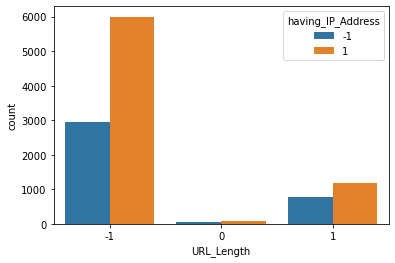

In [13]:
sns.countplot(df['URL_Length'],hue='having_IP_Address',data=df)

<AxesSubplot:ylabel='having_IP_Address'>

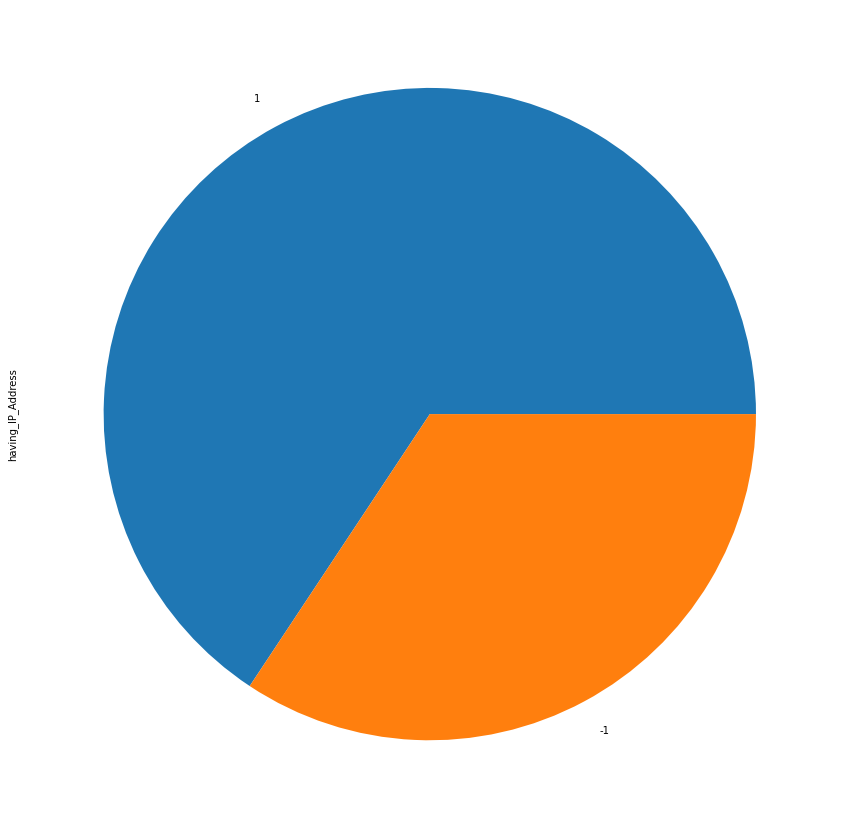

In [19]:
df["having_IP_Address"].value_counts().plot.pie(y=df["having_IP_Address"],figsize=(15,15))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='having_IP_Address', ylabel='count'>

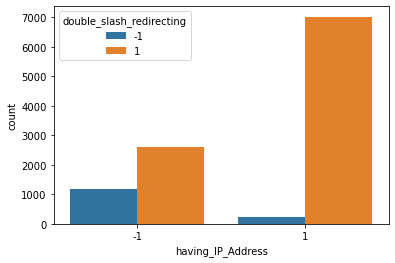

In [17]:
sns.countplot(df['having_IP_Address'],hue='double_slash_redirecting',data=df)

<AxesSubplot:ylabel='double_slash_redirecting'>

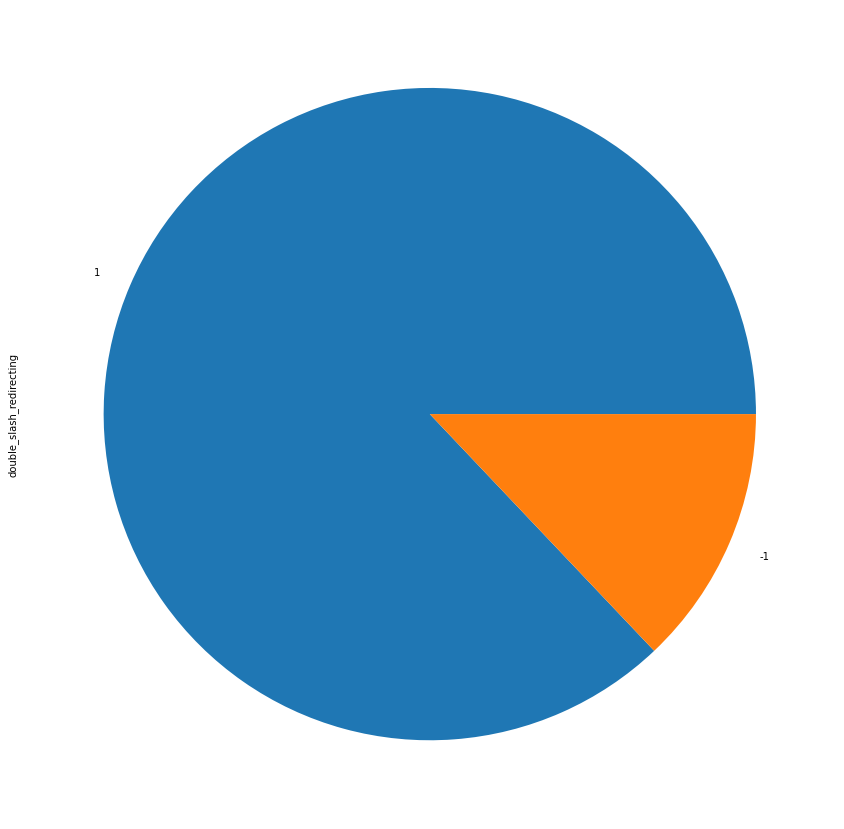

In [20]:
df["double_slash_redirecting"].value_counts().plot.pie(y=df["double_slash_redirecting"],figsize=(15,15))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='double_slash_redirecting', ylabel='count'>

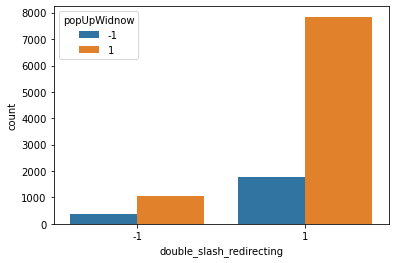

In [23]:
sns.countplot(df['double_slash_redirecting'],hue='popUpWidnow',data=df)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popUpWidnow', ylabel='count'>

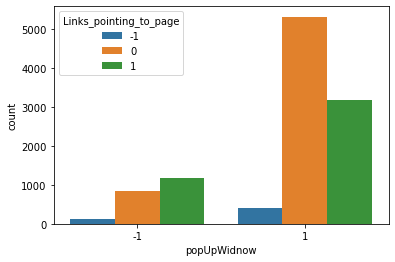

In [12]:
sns.countplot(df['popUpWidnow'],hue='Links_pointing_to_page',data=df)

<AxesSubplot:xlabel='popUpWidnow', ylabel='Density'>

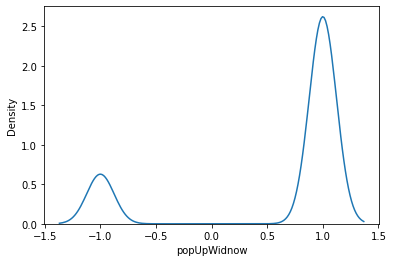

In [24]:
sns.kdeplot(df['popUpWidnow'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Links_pointing_to_page', ylabel='count'>

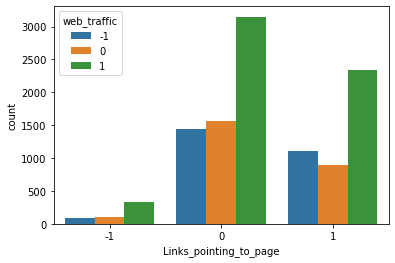

In [27]:
sns.countplot(df['Links_pointing_to_page'],hue='web_traffic',data=df)

<AxesSubplot:xlabel='web_traffic', ylabel='Density'>

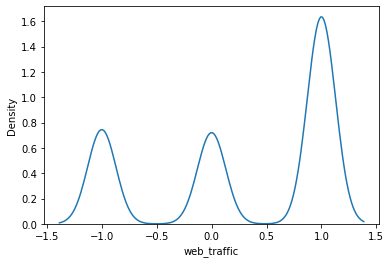

In [26]:
sns.kdeplot(df['web_traffic'])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='web_traffic', ylabel='count'>

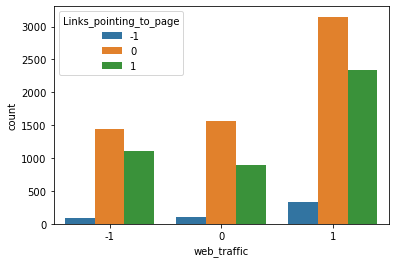

In [14]:
sns.countplot(df['web_traffic'],hue='Links_pointing_to_page',data=df)